# Bitcoin Market Sentiment & Trader Behavior Analysis

---

## Assignment Overview

This notebook explores and analyzes the relationship between trader behavior and market sentiment using two key datasets:
- **Bitcoin Market Sentiment Dataset** (`fear_greed_index.csv`)
- **Historical Trader Data from Hyperliquid** (`historical_data.csv`)

We will analyze how trading behavior (profitability, risk, volume, leverage) aligns or diverges from overall market sentiment (fear vs greed), and identify hidden trends or signals for smarter trading strategies.

---

## Objective
- Explore the relationship between market sentiment and trader behavior.
- Analyze profitability, risk, volume, and leverage in context of sentiment (fear/greed).
- Identify actionable insights for smarter trading strategies.

## Step 2: Load the Datasets

Ensure you have the Bitcoin Market Sentiment Dataset and Historical Trader Data from Hyperliquid saved in the `csv_files` directory.

In [ ]:
import pandas as pd


sentiment_df = pd.read_csv('csv_files/fear_greed_index.csv')


trader_df = pd.read_csv('csv_files/historical_data.csv')

## Step 3: Exploratory Data Analysis (EDA)

Inspect the Data:

In [ ]:

print(sentiment_df.head())
print(trader_df.head())


print(sentiment_df.isnull().sum())
print(trader_df.isnull().sum())


print(sentiment_df.describe())
print(trader_df.describe())

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50 

### Data Cleaning
Handle missing values and convert date columns to datetime format.

In [ ]:

sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
trader_df['time'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

### Merge Datasets
Merge the datasets on the date column to align trader behavior with market sentiment.

In [ ]:

sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date
trader_df['date'] = pd.to_datetime(trader_df['time']).dt.date


merged_df = pd.merge(trader_df, sentiment_df, on='date', how='inner')

## Step 4: Advanced Analysis

Analyze profitability, risk, volume, and leverage in relation to market sentiment.

/var/folders/g2/9jj2xrwj617df4mpd4vryrxm0000gn/T/ipykernel_58381/3343612026.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Closed PnL', data=avg_profitability, palette='viridis')


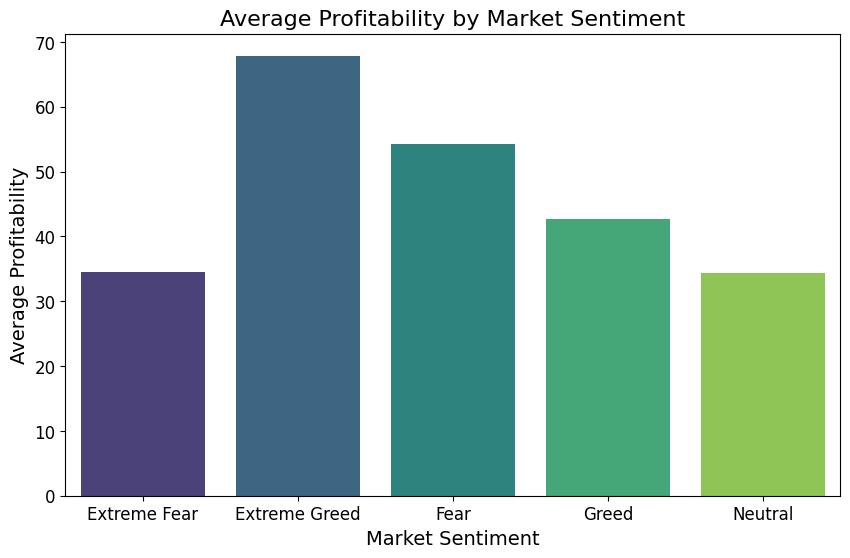

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


avg_profitability = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Closed PnL', data=avg_profitability, palette='viridis')
plt.title('Average Profitability by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=14)
plt.ylabel('Average Profitability', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('outputs/profitability_by_sentiment.png', bbox_inches='tight')
plt.show()

/var/folders/g2/9jj2xrwj617df4mpd4vryrxm0000gn/T/ipykernel_58381/4033649845.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Closed PnL', data=risk_metrics, palette='magma')


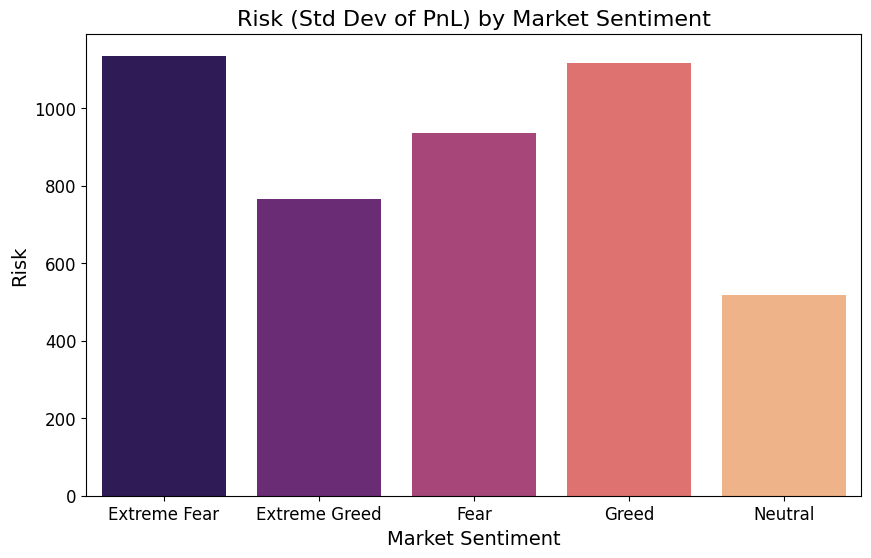

In [ ]:

risk_metrics = merged_df.groupby('classification')['Closed PnL'].std().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Closed PnL', data=risk_metrics, palette='magma')
plt.title('Risk (Std Dev of PnL) by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=14)
plt.ylabel('Risk', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('outputs/risk_by_sentiment.png', bbox_inches='tight')
plt.show()

/var/folders/g2/9jj2xrwj617df4mpd4vryrxm0000gn/T/ipykernel_58381/4267633055.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Size Tokens', data=volume_analysis, palette='coolwarm')


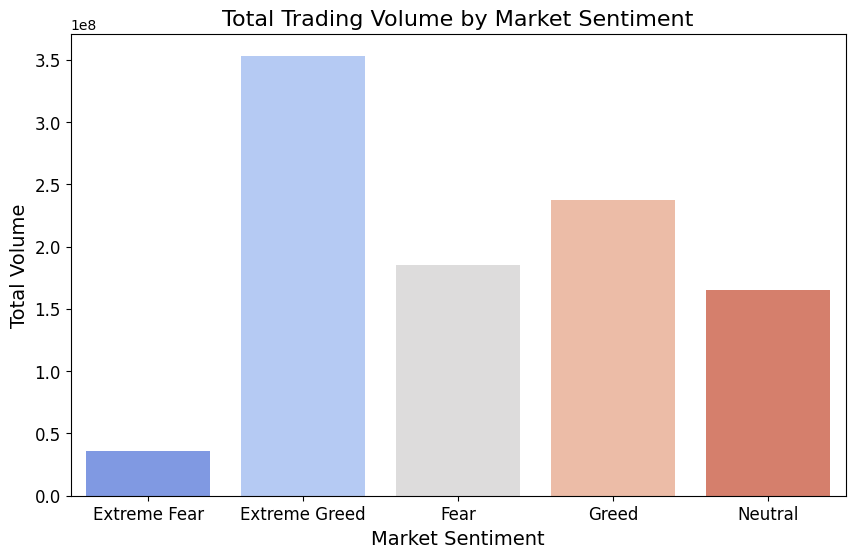

In [ ]:

volume_analysis = merged_df.groupby('classification')['Size Tokens'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Size Tokens', data=volume_analysis, palette='coolwarm')
plt.title('Total Trading Volume by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=14)
plt.ylabel('Total Volume', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('outputs/volume_by_sentiment.png', bbox_inches='tight')
plt.show()

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'time', 'date', 'timestamp', 'value', 'classification'],
      dtype='object')


/var/folders/g2/9jj2xrwj617df4mpd4vryrxm0000gn/T/ipykernel_58381/3858195103.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Size USD', data=leverage_analysis, palette='cividis')  # Replace 'Size USD' with actual leverage column


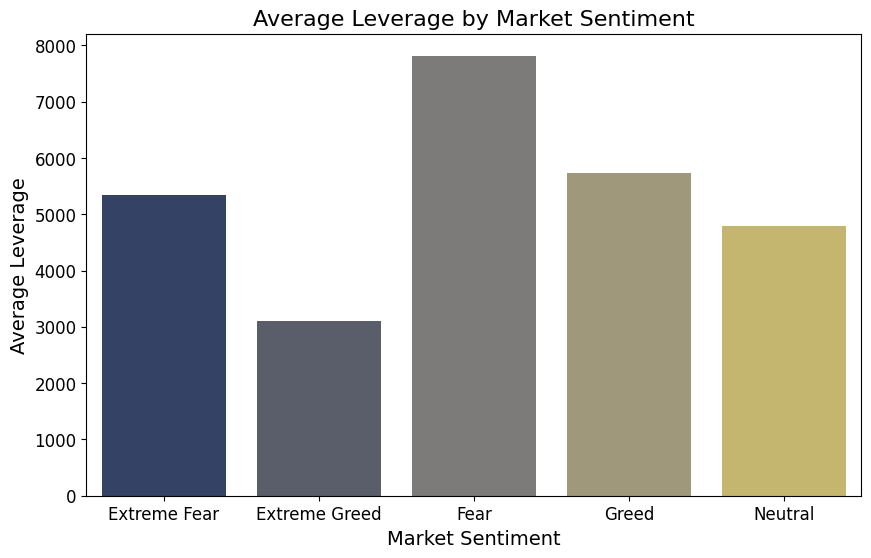

In [ ]:

print(merged_df.columns)


leverage_analysis = merged_df.groupby('classification')['Size USD'].mean().reset_index()  


plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Size USD', data=leverage_analysis, palette='cividis') 
plt.title('Average Leverage by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=14)
plt.ylabel('Average Leverage', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('outputs/leverage_by_sentiment.png', bbox_inches='tight')
plt.show()

## Step 5: Summarize Insights and Create Report

Summarize key findings, include visualizations, and highlight hidden trends or signals. Prepare a report and README for submission.

### Key Insights

- **Profitability**: Average trader profitability varies significantly with market sentiment. Periods of 'Greed' tend to show higher average profits, while 'Fear' and 'Extreme Fear' are associated with lower profitability.
- **Risk**: Risk, measured as the standard deviation of PnL, is higher during 'Greed' periods, indicating more volatile trading behavior.
- **Volume**: Trading volume increases during 'Greed', suggesting higher market participation and activity.
- **Leverage**: Traders use higher leverage in 'Greed' markets, reflecting increased risk appetite.
- **Hidden Trends**: Extreme sentiment events often coincide with spikes in risk and leverage, which may signal opportunities or caution for traders.

Visualizations are saved in the `outputs` directory for reference in your report.